In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


## 切割train 和test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

## 不需要做特徵標準化(DT & RF)

# DT

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [10]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
#預測之資料
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [13]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

## 計算正確率

In [14]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print(i,v)
        error+=1
print(error)

0


In [15]:
tree.score(X_test,y_test['target'])

1.0

## 畫圖

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

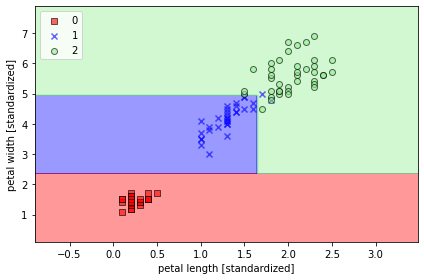

In [29]:
#花瓣寬度大於2.多判斷為1類，花瓣寬度小於2.多判斷為0類
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 畫圖(Tree 視覺化)

In [20]:
!brew install graphviz

HOMEBREW_BREW_GIT_REMOTE set: using https://mirrors.ustc.edu.cn/brew.git as the Homebrew/brew Git remote.
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Total 83 (delta 18), reused 18 (delta 18), pack-reused 65
Unpacking objects: 100% (83/83), 56.65 KiB | 951.00 KiB/s, done.
From https://mirrors.ustc.edu.cn/brew
   a380aed88..c34e833b0  master     -> origin/master
Running `brew update --auto-update`...
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/bottles-portable-ruby/portable-ruby-2.6.10_1.el_capitan.bottle.tar.gz
######################################################################### 100.0%  2.9%##                                              40.3%          88.9%#######################################   99.7%
==> Pouring portable-ruby-2.6.10_1.el_capitan.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
aarch64-elf-gdb                          libomemo-c
access   

######################################################################### 100.0%
==> Fetching lz4
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/lz4-1.9.4.monterey.
######################################################################### 100.0%
==> Fetching xz
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/xz-5.4.3.monterey.b
######################################################################### 100.0%
==> Fetching zstd
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/zstd-1.5.5.monterey
######################################################################### 100.0%
==> Fetching libtiff
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/libtiff-4.5.0.monte
######################################################################### 100.0%
==> Fetching little-cms2
==> Downloading https://mirrors.ustc.edu.cn/homebrew-bottles/little-cms2-2.15.mo
######################################################################### 100.0%
==> Fetching

######################################################################### 100.0%
==> Installing dependencies for graphviz: libpng, freetype, fontconfig, jpeg-turbo, brotli, giflib, highway, imath, lz4, xz, zstd, libtiff, little-cms2, openexr, webp, jpeg-xl, libvmaf, aom, libavif, gd, glib, jasper, netpbm, gts, xorgproto, libxau, libxdmcp, libxcb, libx11, libxext, libxrender, lzo, pixman, cairo, gdk-pixbuf, fribidi, graphite2, icu4c, harfbuzz, pango, librsvg, m4 and libtool
==> Installing graphviz dependency: libpng
==> Pouring libpng-1.6.39.monterey.bottle.1.tar.gz
🍺  /usr/local/Cellar/libpng/1.6.39: 27 files, 1.3MB
==> Installing graphviz dependency: freetype
==> Pouring freetype-2.13.0_1.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/freetype/2.13.0_1: 67 files, 2.4MB
==> Installing graphviz dependency: fontconfig
==> Pouring fontconfig-2.14.2.monterey.bottle.tar.gz
==> Regenerating font cache, this may take a while
==> /usr/local/Cellar/fontconfig/2.14.2/bin/fc-cache -frv
🍺  /usr/local

🍺  /usr/local/Cellar/icu4c/72.1: 263 files, 77.9MB
==> Installing graphviz dependency: harfbuzz
==> Pouring harfbuzz-7.3.0.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/harfbuzz/7.3.0: 76 files, 9.4MB
==> Installing graphviz dependency: pango
==> Pouring pango-1.50.14.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/pango/1.50.14: 68 files, 3.2MB
==> Installing graphviz dependency: librsvg
==> Pouring librsvg-2.56.1.monterey.bottle.tar.gz
==> /usr/local/opt/gdk-pixbuf/bin/gdk-pixbuf-query-loaders --update-cache
🍺  /usr/local/Cellar/librsvg/2.56.1: 22 files, 43.4MB
==> Installing graphviz dependency: m4
==> Pouring m4-1.4.19.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/m4/1.4.19: 13 files, 740.7KB
==> Installing graphviz dependency: libtool
==> Pouring libtool-2.4.7.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/libtool/2.4.7: 75 files, 3.8MB
==> Installing graphviz
==> Pouring graphviz-8.0.5.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/graphviz/8.0.5: 326 files, 12.7MB
==> Running `brew cleanup gr

==> /usr/local/Cellar/python@3.11/3.11.3/bin/python3.11 -m pip install -v --no-d
🍺  /usr/local/Cellar/python@3.11/3.11.3: 3,176 files, 61.4MB
==> Installing llvm dependency: six
==> Pouring six-1.16.0_3.all.bottle.tar.gz
🍺  /usr/local/Cellar/six/1.16.0_3: 20 files, 122.3KB
==> Installing llvm dependency: z3
==> Pouring z3-4.12.2.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/z3/4.12.2: 118 files, 31.4MB
==> Installing llvm
==> Pouring llvm-16.0.4.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/llvm/16.0.4: 6,779 files, 1.6GB
==> Running `brew cleanup llvm`...
Removing: /usr/local/Cellar/llvm/13.0.1_1... (5,449 files, 941.7MB)
==> Upgrading crystal
  1.4.1 -> 1.8.2 

==> Installing dependencies for crystal: bdw-gc and llvm@15
==> Installing crystal dependency: bdw-gc
==> Pouring bdw-gc-8.2.4.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/bdw-gc/8.2.4: 73 files, 1.6MB
==> Installing crystal dependency: llvm@15
==> Pouring llvm@15-15.0.7.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/llvm@15/15.0.7: 5

In [21]:
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])

## 三類花

In [23]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,petal width (cm),petal length (cm),target
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

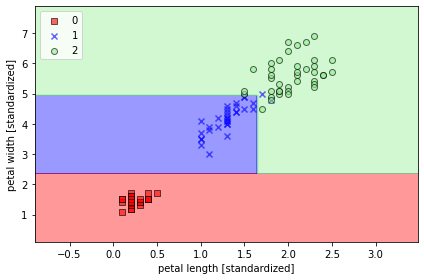

In [28]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
export_graphviz(tree, out_file='tree2.dot', feature_names=['sepal length (cm)','petal length (cm)'])

# RF

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=3,n_jobs=2)

In [33]:
forest.fit(X_train,y_train['target'].values)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=3)

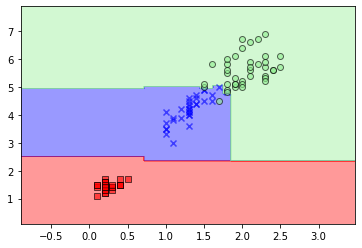

In [34]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=forest)